In [1]:
#Importing necessities

import numpy as np
import struct as st
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#Function to perform Gradient Descent in Neural Network

def NeuralNetGD(X,Y,h,n, alpha, nob, ite): 
    b = Y.shape[1]//nob
    
    
    X = (X - X.min(axis = 0))/(X.max(axis = 0)-X.min(axis = 0))
    #Parameters for first layer
    w1 = 2/np.sqrt(n)*np.random.randn(h, 784)
    b1 = np.zeros((h,1))
    #Parameters for second layer
    w2 = 2/np.sqrt(h)*np.random.randn(10, h)
    b2 = np.zeros((10,1))
    i = 0
    while True:
    #First Layer
        for j in range(nob):
            
            #Creating mini batches for faster optimization
            X1 = X[:,j*b:(j+1)*b]
            Y1 = Y[:,j*b:(j+1)*b]
            
            z1 = np.dot(w1,X1) + b1 
            a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
            #Batch Normalization
            a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)   
            #Second Layer
            z2 = np.dot(w2, a1) + b2
            a2 = 1/(1+ np.exp(-z2)) #Sigmoid Activation Function for Layer 2
            
            #Let us do backpropagation now
    
            dLda2 = (1/Y1.shape[1])*(a2 - Y1) 
            da2dz2 = a2*(1-a2)
            dz2dw2 = a1
            dz2db2 = np.ones((X1.shape[1],1)) 
            dz2da1 = w2
            da1dz1 = np.where(a1<0, 0.01, 1)
            dz1dw1 = X1
            dz1db1 = np.ones((X1.shape[1], 1))
            
            dw2 = np.dot(dLda2*da2dz2, dz2dw2.T)
            db2 = np.dot(dLda2*da2dz2, dz2db2)
            #print(dw2.shape, db2.shape)
            dw1 = np.dot(((np.dot(dz2da1.T, dLda2*da2dz2)))*da1dz1, dz1dw1.T)
            db1 = np.dot(((np.dot(dz2da1.T, dLda2*da2dz2)))*da1dz1, dz1db1)
            #print(dw1.shape, db1.shape)
            
            #Parameter Update
            w2 = w2 - alpha*dw2
            w1 = w1 - alpha*dw1
            b2 = b2 - alpha*db2
            b1 = b1 - alpha*db1
        i+=1
        z1 = np.dot(w1,X) + b1 
        a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
        #Batch Normalization
        a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)   
        #Second Layer
        z2 = np.dot(w2, a1) + b2
        a2 = 1/(1+ np.exp(-z2))
        error = np.sum((a2 - Y)**2)
        print(error, i)
        print(a2[:,0],Y[:,0])
        plt.scatter(i,error, color='blue',label='Training data')
        if i == ite:
            return w1, w2, b1, b2
    plt.title("Loss Optimization")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

In [3]:
#Train data Extraction

filename = {'images' : '/home/abhineet/Documents/Quantiphi/Training/Assignments/Assignment4/train-images.idx3-ubyte' ,'labels' : '/home/abhineet/Documents/Quantiphi/Training/Assignments/Assignment4/train-labels.idx1-ubyte'}
#reading images data
train_imagesfile = open(filename['images'],'rb')
magicimages = st.unpack('>4B',train_imagesfile.read(4))
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of column
nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
images = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((nImg,nR*nC))
#reading label data
train_labelfile = open(filename['labels'],'rb')
magiclabel = st.unpack('>4B',train_labelfile.read(4))
nLabels = st.unpack('>I',train_labelfile.read(4))[0] #num of labels
labels = np.asarray(st.unpack('>'+'B'*nLabels,train_labelfile.read(nLabels))).reshape((nLabels))


In [4]:
#Creating the labels matrix as a binary matrix

labelsmatrix = np.zeros((nLabels, 10))
for i in range(nLabels):
    labelsmatrix[i][labels[i]] = 1

In [5]:
#Splitting data into training and testing sets    

X_train, X_test, y_train, y_test = train_test_split(images, labelsmatrix, test_size=0.2, random_state = 2)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

42647.617727956145 1
[6.42319864e-02 1.04954373e-04 4.66545167e-04 2.00909511e-04
 1.03870035e-01 1.01914897e-04 6.22978683e-05 7.41142685e-06
 8.91713040e-06 8.84462469e-02] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
43088.61079186563 2
[6.67294879e-03 5.08825449e-05 1.97227450e-01 7.55328086e-05
 2.40054331e-04 8.21797942e-05 1.02149159e-04 3.17405479e-05
 6.16087253e-05 4.27836864e-06] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
43625.719089801714 3
[2.20003463e-03 1.97580759e-04 1.45375657e-05 4.78830259e-04
 1.89168714e-04 1.24241894e-04 1.13729424e-04 3.21883462e-05
 4.65870039e-05 4.13248174e-04] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
39612.59592948774 4
[3.94777217e-04 7.06835016e-04 8.20392368e-07 4.61195921e-01
 1.28163847e-04 4.21495395e-02 1.26294085e-04 1.28568300e-03
 3.24250726e-02 3.25485541e-05] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
26041.71853394473 5
[1.85153346e-05 1.10348891e-03 6.65778565e-04 9.57940249e-01
 1.20291078e-04 6.41453313e-05 3.17911889e-04 1.30143626e-03
 1.28451544e-03 7.41003693e-04] 

2905.4622987315815 41
[3.32600987e-04 1.46248104e-04 5.87665255e-05 9.93807722e-01
 2.35832379e-06 3.09062876e-03 2.43250067e-05 1.01811837e-07
 3.69014090e-03 1.44323913e-03] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
2837.830111306216 42
[2.92055561e-04 1.44844453e-04 4.84858595e-05 9.93181555e-01
 2.48849125e-06 3.48372454e-03 1.92314875e-05 9.08300807e-08
 3.01516988e-03 1.34443371e-03] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
2817.2131116098476 43
[2.58616261e-04 1.43253628e-04 4.53675664e-05 9.93340323e-01
 2.30354587e-06 3.16043571e-03 2.34337443e-05 6.00783137e-08
 3.37654558e-03 1.36251749e-03] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
2757.976371567843 44
[2.32737140e-04 1.45420041e-04 3.84188129e-05 9.93852556e-01
 2.24850762e-06 3.16493756e-03 1.85910339e-05 7.05337411e-08
 2.91506812e-03 1.31778940e-03] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
2709.0112362027635 45
[2.09172128e-04 1.51123036e-04 3.82915421e-05 9.94437436e-01
 2.71028366e-06 3.47913509e-03 1.97755644e-05 5.64935617e-08
 2.65995756e-03 1.31994442

2033.9981022724603 81
[4.99651170e-05 1.18567922e-04 8.39488580e-06 9.79498567e-01
 7.84986370e-07 2.04146766e-03 1.90703794e-05 1.11469279e-08
 8.63673323e-03 2.60216643e-04] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1982.0390143107509 82
[4.40281998e-05 1.18014046e-04 9.80557969e-06 9.79985532e-01
 5.52967171e-07 1.31534346e-03 1.34815412e-05 1.09254930e-08
 1.03182505e-02 2.22382324e-04] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1937.2644422934925 83
[3.93765112e-05 1.10693418e-04 1.09422811e-05 9.81091799e-01
 3.00942640e-07 1.16969988e-03 1.14469174e-05 1.12699919e-08
 1.01470693e-02 2.67766253e-04] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1959.0904794185478 84
[4.39065036e-05 1.19668150e-04 8.56222077e-06 9.74748113e-01
 5.29398667e-07 1.67154439e-03 1.35264108e-05 1.08163801e-08
 9.14268518e-03 2.32693711e-04] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1904.8239028371688 85
[4.27689233e-05 1.10460041e-04 7.96899494e-06 9.77773627e-01
 3.38722724e-07 1.42881405e-03 1.10202901e-05 1.10056266e-08
 7.08670952e-03 2.375325

1620.116096376611 121
[9.44965402e-06 1.13011279e-04 1.53874171e-06 9.64655725e-01
 5.33880628e-08 8.05072683e-04 2.49782672e-06 3.38719104e-09
 4.88192355e-03 7.35349781e-05] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1644.3203236039062 122
[8.06116199e-06 9.56182541e-05 1.33325505e-06 9.63285500e-01
 6.36193064e-08 9.53389316e-04 2.58359092e-06 3.65940652e-09
 5.40774974e-03 6.02636374e-05] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1703.2474859710128 123
[8.38497010e-06 1.08117422e-04 1.27769438e-06 9.72693512e-01
 4.56784650e-08 5.61107450e-04 2.40373414e-06 2.50678636e-09
 4.86443855e-03 4.90219767e-05] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1601.9554192356202 124
[6.55181423e-06 9.11244618e-05 1.55102308e-06 9.62865221e-01
 3.82198282e-08 1.15172173e-03 2.02985164e-06 3.75206633e-09
 4.78563949e-03 4.97565633e-05] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1626.7710133639187 125
[6.73496154e-06 1.10301108e-04 1.19159028e-06 9.65905832e-01
 4.80401961e-08 8.70482671e-04 2.19897014e-06 2.73251093e-09
 4.24725716e-03 5.80

1391.2987858297142 161
[1.44864471e-06 1.26991932e-04 8.22952693e-07 9.75459805e-01
 1.51192259e-08 1.41412825e-03 4.59174709e-07 1.10903312e-09
 1.10820433e-03 7.33608701e-06] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1411.7742151240186 162
[1.22226235e-06 1.31048504e-04 7.56656277e-07 9.76112828e-01
 1.09958570e-08 1.70106702e-03 4.49316003e-07 7.39740659e-10
 1.20684214e-03 7.36628074e-06] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1372.3440568306926 163
[1.26834200e-06 1.37671385e-04 8.24780634e-07 9.78048132e-01
 1.04407153e-08 1.49867966e-03 4.14569992e-07 8.78083405e-10
 1.03452983e-03 6.75477221e-06] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1398.3871762494912 164
[1.30012764e-06 1.32996474e-04 7.43439478e-07 9.72534841e-01
 1.23323202e-08 1.60481053e-03 4.20400582e-07 7.51332835e-10
 2.06120214e-03 7.70150061e-06] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1366.6711042739078 165
[1.30790652e-06 1.39533134e-04 8.45778806e-07 9.75802720e-01
 1.00755485e-08 1.89535943e-03 3.88321900e-07 6.11674376e-10
 1.27619520e-03 8.6

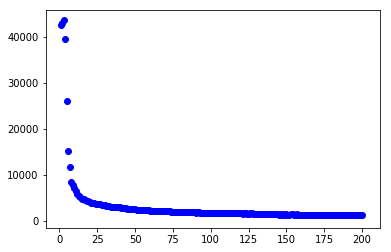

In [6]:
#Passing in arguments

w1, w2, b1, b2 = NeuralNetGD(X_train, y_train, 200, 784, .5, 192, 200)


In [8]:
#For accuracy calculation on Validation Set

X_test = (X_test - X_test.min(axis = 0))/(X_test.max(axis = 0)-X_test.min(axis = 0))
z1 = np.dot(w1,X_test) + b1 
a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)            
z2 = np.dot(w2, a1) + b2
a2 = 1/(1+ np.exp(-z2)) #Sigmoid Activation Function for Layer 2

k=0
m1 = np.max(a2, axis = 0)
m2 = np.max(a2*y_test, axis = 0)
for i in range(y_test.shape[1]):
    if m1[i]==m2[i]:
        k+=1
        
print("Accuracy is on Validation Set:", k*100/y_test.shape[1])

Accuracy is on Validation Set: 96.66666666666667


In [9]:
#Test data extraction

filename = {'images1' : '/home/abhineet/Documents/Quantiphi/Training/Assignments/Assignment4/t10k-images.idx3-ubyte' ,'labels1' : '/home/abhineet/Documents/Quantiphi/Training/Assignments/Assignment4/t10k-labels-idx1-ubyte'}
#reading images data
test_imagesfile = open(filename['images1'],'rb')
magicimages = st.unpack('>4B',test_imagesfile.read(4))
nImg = st.unpack('>I',test_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',test_imagesfile.read(4))[0] #num of column
nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
images1 = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,test_imagesfile.read(nBytesTotal))).reshape((nImg,nR*nC))
#reading label data
test_labelfile = open(filename['labels1'],'rb')
magiclabel = st.unpack('>4B',test_labelfile.read(4))
nLabels = st.unpack('>I',test_labelfile.read(4))[0] #num of labels
labels1 = np.asarray(st.unpack('>'+'B'*nLabels,test_labelfile.read(nLabels))).reshape((nLabels))

#Creating the labels matrix as a binary matrix
labels1matrix = np.zeros((nLabels, 10))
for i in range(nLabels):
    labels1matrix[i][labels1[i]] = 1
    
images1 = images1.T
labels1matrix = labels1matrix.T

In [10]:
#For accuracy calculation on Test Set

images1 = (images1 - images1.min(axis = 0))/(images1.max(axis = 0)-images1.min(axis = 0))
z1 = np.dot(w1,images1) + b1 
a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)            
z2 = np.dot(w2, a1) + b2
a2 = 1/(1+ np.exp(-z2)) #Sigmoid Activation Function for Layer 2

k=0
m1 = np.max(a2, axis = 0)
m2 = np.max(a2*labels1matrix, axis = 0)
for i in range(labels1matrix.shape[1]):
    if m1[i]==m2[i]:
        k+=1
        
print("Accuracy on Test Set is:", k*100/labels1matrix.shape[1])

Accuracy on Test Set is: 97.14
